# CS5950J Course Project

The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 



In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.optim as optim 

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

In [ ]:
transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)

/home/cim/pgt/mjac097/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [ ]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)

class NN1(nn.Module):
    
    def __init__(self): 
        super(NN1, self).__init__()
        self.layers = nn.Sequential( 
            nn.Flatten(), 
            nn.Linear(784,10)) 
        
    def forward( self, x ):
        x = self.layers( x )
        return x

In [ ]:
def train(neural_net,data,size,optimizer,loss_function,calc_error_rate = False):
    data =  [ data[i] for i in range(0,size) ] 
    trainloader = torch.utils.data.DataLoader( data, batch_size=32, shuffle=True)
    loss=[]
    accuracy = []
    for epoch in range(200): 
        current_loss = 0.0 
        n_mini_batches = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
            lf = loss_function ( neural_net(images), labels )
            lf.backward() 
            optimizer.step()
            n_mini_batches += 1 
            current_loss += lf.item() 
        loss.append(current_loss / n_mini_batches)
        if calc_error_rate:
            accuracy.append(test(neural_net,data))
    if calc_error_rate:
        return loss,accuracy 
    return loss
       

In [ ]:
def test(neural_net,data):
    testloader = torch.utils.data.DataLoader( data, batch_size=32, shuffle=True)
    correct = 0 
    total = 0 
    with torch.no_grad():  
        for images, labels in testloader:
            _, predicted = torch.max(neural_net(images), dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item() 
    return(100 * correct/total)

In [ ]:
neural_net = NN1()
optimizer = optim.RMSprop(neural_net.parameters(), lr=0.0001 )
loss_function = nn.CrossEntropyLoss()
loss,accuracy = train(neural_net,mnist_trainset,4000,optimizer,loss_function,calc_error_rate = True)


### Loss as a function of training epoch

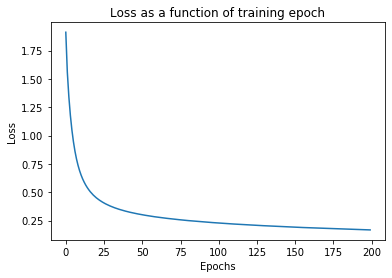

In [ ]:
plt.plot(loss)
plt.title("Loss as a function of training epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
pass

### Error rate as a function of training epoch

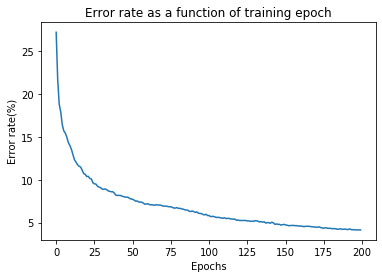

In [ ]:
error_rate = 100-np.array(accuracy)
plt.plot(error_rate)
plt.title("Error rate as a function of training epoch")
plt.xlabel("Epochs")
plt.ylabel("Error rate(%)")
pass

In [ ]:
test_set_accuracy = test(neural_net,mnist_testset)
print(f"Accuracy for test set = {test_set_accuracy}%")


Accuracy for test set = 90.32%


### 2.  Regularisation experiment: 

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

For L2 regularisation, compare 0 regularisation with very small amounts of regularisation -- try 0.0001, 0.001, 0.01, and see for what level of L2 regularisation there starts to be an effect. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [ ]:
# your code here 

L2_regularisation = [0,0.0001, 0.001, 0.01,0.1]
accuracy = []
for l2 in L2_regularisation:
    neural_net = NN1()
    optimizer = optim.RMSprop(neural_net.parameters(), lr=0.0001,weight_decay = l2 )
    loss = train(neural_net,mnist_trainset,4000,optimizer,loss_function)
    accuracy.append(test(neural_net,mnist_testset))


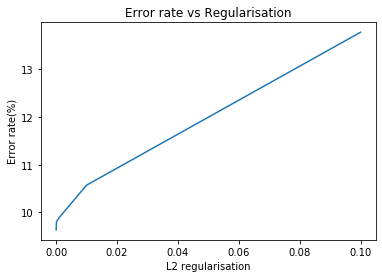

In [ ]:
error_rate = 100-np.array(accuracy)
plt.plot(L2_regularisation,error_rate)
plt.title("Error rate vs Regularisation")
plt.xlabel("L2 regularisation")
plt.ylabel("Error rate(%)")
pass

As the regularisation increases, the error rate is observed to increase. This means that the performance of the neural network decreases. Since the applied learning rate is very low, adding regularisation does not do anything to improve the performance.

In [ ]:
optimal_l2 = L2_regularisation[error_rate.argmin()]
print(f"Optimal l2 = {optimal_l2}")
print(f"Minimum error rate = {error_rate.min()}%")


Optimal l2 = 0
Minimum error rate = 9.629999999999995%


### 3.  Learning curve experiment:  

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [ ]:
# your code here
training_set_sizes= [500, 1000, 2000, 4000, 8000, 16000, 32000]
accuracy_first_model = []
for size in training_set_sizes:
    neural_net = NN1()
    optimizer = optim.RMSprop(neural_net.parameters(), lr=0.0001,weight_decay = optimal_l2 )
    loss = train(neural_net,mnist_trainset,size,optimizer,loss_function)
    accuracy_first_model.append(test(neural_net,mnist_testset))

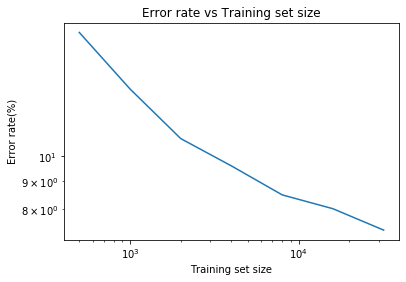

In [ ]:
error_rate_first_model = 100-np.array(accuracy_first_model)
plt.loglog(training_set_sizes,error_rate_first_model)
plt.title("Error rate vs Training set size")
plt.xlabel("Training set size")
plt.ylabel("Error rate(%)")
pass

As we increase the training set size, the error rate is observed to decrease. The shape of the graph is similar to the graph obtained for a 1/√n graph. Therefore we can say that the error rate is decreasing at a rate proportional to 1/√n where n is the training set size.

### 4. Second model:   

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [ ]:
# your code here
class Conv_NN1(NN1):
    
    def __init__(self): 
        super(NN1, self).__init__()
        self.layers = nn.Sequential(  
            nn.Conv2d(1,10,kernel_size = 28),
            nn.Flatten()
        ) 

In [ ]:
L2_regularisation = [0,0.0001, 0.001, 0.01,0.1]
accuracy = []
for l2 in L2_regularisation:
    neural_net = Conv_NN1()
    optimizer = optim.RMSprop(neural_net.parameters(), lr=0.0001,weight_decay = l2 )
    loss = train(neural_net,mnist_trainset,4000,optimizer,loss_function)
    accuracy.append(test(neural_net,mnist_testset))

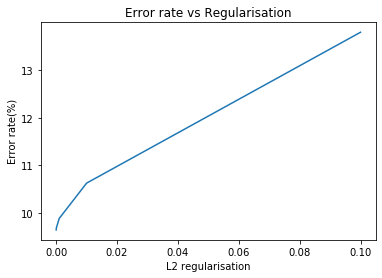

In [ ]:
error_rate_conv = 100-np.array(accuracy)
plt.plot(L2_regularisation,error_rate_conv)
plt.title("Error rate vs Regularisation")
plt.xlabel("L2 regularisation")
plt.ylabel("Error rate(%)")
pass

There does not seem to be a big difference in the two models. The convolutional model gives a slightly lower error rate than the first model.

In [ ]:
optimal_l2_conv = L2_regularisation[error_rate_conv.argmin()]
print(f"Optimal l2 = {optimal_l2_conv}")
print(f"Minimum error rate = {error_rate_conv.min()}%")


Optimal l2 = 0
Minimum error rate = 9.650000000000006%


In [ ]:
training_set_sizes_conv= [500, 1000, 2000, 4000, 8000, 16000, 32000]
#training_set_sizes= [500, 1000]
accuracy_conv = []
for size in training_set_sizes_conv:
    neural_net = Conv_NN1()
    optimizer = optim.RMSprop(neural_net.parameters(), lr=0.0001,weight_decay = optimal_l2_conv )
    loss = train(neural_net,mnist_trainset,size,optimizer,loss_function)
    accuracy_conv.append(test(neural_net,mnist_testset))

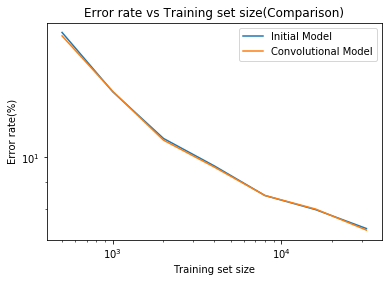

In [ ]:
error_rate_conv = 100-np.array(accuracy_conv)
plt.loglog(training_set_sizes_conv,error_rate_conv,label = "Initial Model")
plt.loglog(training_set_sizes,error_rate_first_model,label = "Convolutional Model")
plt.title("Error rate vs Training set size(Comparison)")
plt.xlabel("Training set size")
plt.ylabel("Error rate(%)")
plt.legend()
pass

Both models give a similar learning curve.